In [1]:
from os import path
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH=path.join('..','..','Parihaka')

LABEL_PATH=path.join(DATA_PATH, 'labels')
SEISMIC_PATH=path.join(DATA_PATH, 'png')
OUTPUT_PATH=path.join('..','images')

print(LABEL_PATH)
print(SEISMIC_PATH)

../../Parihaka/labels
../../Parihaka/png


In [2]:
inlines = [2300]

In [3]:
def resample(X, size_out):
    size_in = X.shape
    Y = np.zeros(size_out)
    for i in range(size_out[0]):
        for j in range(size_out[1]):
            I = int(size_in[0] * i / size_out[0])
            J = int(size_in[1] * j / size_out[1])
            Y[i,j] = X[I,J]
    return Y
    
x = np.eye(10)
y = resample(x, (20,20))  

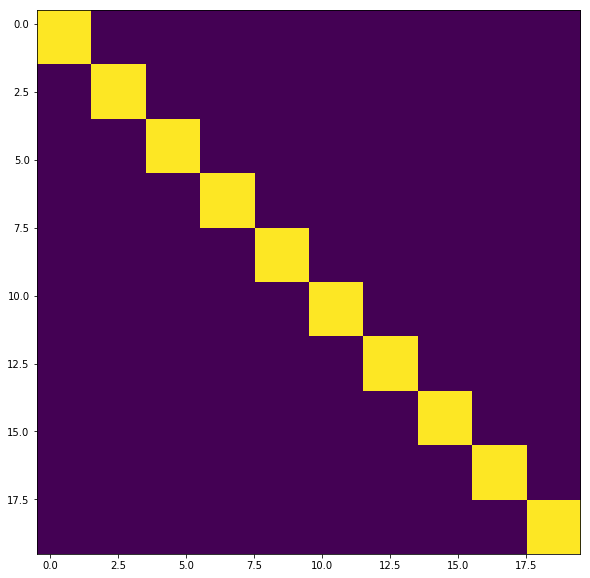

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(y)

g image (351, 671)
rgb image (351, 671, 4)
l image (438, 838, 4)
labels resampled (351, 671)
(128, 128)
(128, 128, 4)
(128, 128)


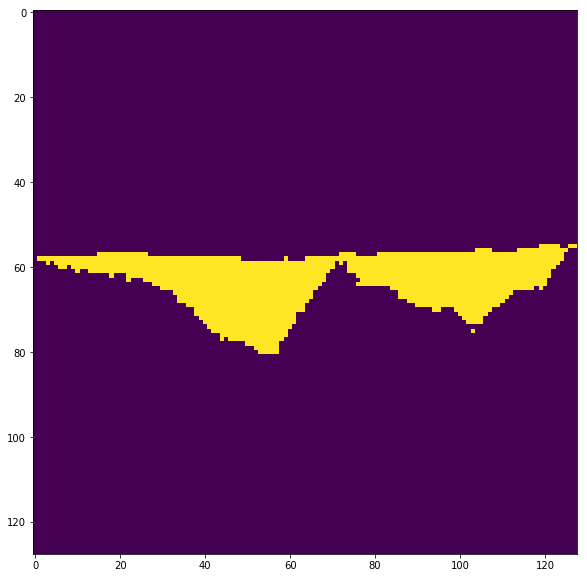

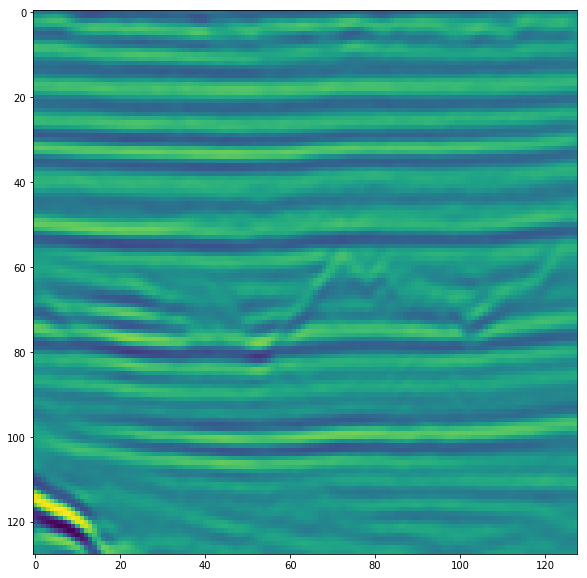

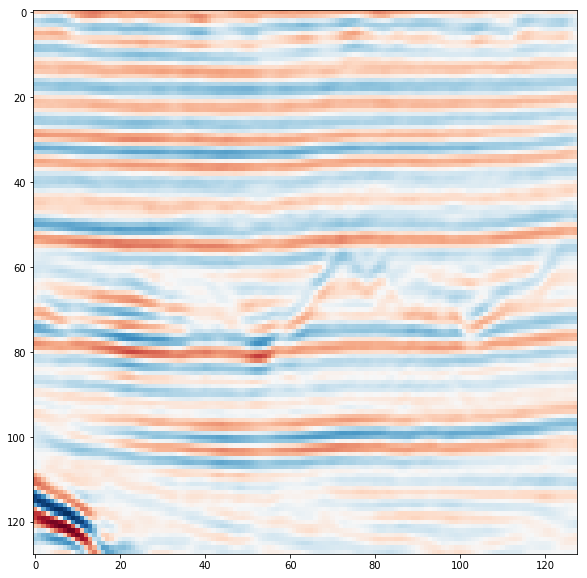

In [14]:
label_names = ['grey_il{}_segmentation.png'.format(il) for il in inlines]
rgb_names = ['rgb_il{}.png'.format(il) for il in inlines]
grey_names = ['grey_il{}.png'.format(il) for il in inlines]

gully_rgb_val = (250, 170, 30)

def crop_at(img, x,y):
    return img[y:y+256,x:x+256]

for g_name, rgb_name, l_name in zip(grey_names, rgb_names, label_names):
    l_image = misc.imread(path.abspath(path.join(LABEL_PATH, l_name)))
    g_image = misc.imread(path.abspath(path.join(SEISMIC_PATH, g_name)))
    rgb_image = misc.imread(path.abspath(path.join(SEISMIC_PATH, rgb_name)))
    print("g image", g_image.shape)
    print("rgb image", rgb_image.shape)
    print("l image", l_image.shape)
    
#     convert to binary
    grey_label = np.zeros_like(l_image[:,:,0])
    for i in range(l_image.shape[0]):
        for j in range(l_image.shape[1]):
            if np.all(l_image[i,j,0:3] == gully_rgb_val):
                grey_label[i,j] = 255
                
    grey_label_resample = resample(grey_label, g_image.shape)
    print("labels resampled", grey_label_resample.shape)
    
    y=60
    x=240
    sz = 128
    
    grey_crop = g_image[y:y+sz, x:x+sz]
    rgb_crop = rgb_image[y:y+sz, x:x+sz, :]
    grey_label_resample_crop = grey_label_resample[y:y+sz, x:x+sz]
    
#     grey_label_crop = np.zeros_like(l_crop[:,:,0])
#     for i in range(l_crop.shape[0]):
#         for j in range(l_crop.shape[1]):
#             if np.all(l_crop[i,j,0:3] == gully_rgb_val):
#                 grey_label_crop[i,j] = 255
    
#     grey_label_crop_resample = resample(grey_label_crop, grey_crop.shape)
    
    print(grey_crop.shape)
    print(rgb_crop.shape)
    print(grey_label_resample_crop.shape)
    
    misc.imsave(path.join(OUTPUT_PATH, 'grey_il2300.crop.png'), grey_crop)
    misc.imsave(path.join(OUTPUT_PATH, 'grey_label_il2300.crop.png'), grey_label_resample_crop)
    misc.imsave(path.join(OUTPUT_PATH, 'rgb_il2300.crop.png'), rgb_crop)    
    
    plt.figure(figsize=(10,10))
    plt.imshow(grey_label_resample_crop)
    
    plt.figure(figsize=(10,10))
    plt.imshow(grey_crop)
    
    plt.figure(figsize=(10,10))
    plt.imshow(rgb_crop)
    